## Matrix Calculation

In [1]:
import numpy as np

In [2]:
# All these objects are from the week-0 math questions.
matrix_a = np.array([
    [1, 3, 4],
    [2, 2, 1],
    [6, 4, 3]
])

matrix_b = np.array([
    [2, 4],
    [1, 1]
])

matrix_c = np.array([
    [7, 3, 3],
    [2, 1, 1],
    [2, 2, 2]
])

matrix_d = np.array([
    [4, 2],
    [4, 6],
    [1, 3]
])

vector_u = np.array([
    [1],
    [3]
])

vector_v = np.array([
    [2],
    [4],
    [1]
])

In [4]:
matrix_a.dot(matrix_c)

array([[21, 14, 14],
       [20, 10, 10],
       [56, 28, 28]])

In [5]:
matrix_c.dot(matrix_a)

array([[31, 39, 40],
       [10, 12, 12],
       [18, 18, 16]])

In [6]:
matrix_a.dot(matrix_d)

array([[20, 32],
       [17, 19],
       [43, 45]])

In [9]:
matrix_c.dot(matrix_d)

array([[43, 41],
       [13, 13],
       [18, 22]])

In [13]:
d_transpose = matrix_d.T
d_transpose

array([[4, 4, 1],
       [2, 6, 3]])

In [18]:
# d_transpose.dot(matrix_c)
d_transpose @ matrix_c

array([[38, 18, 18],
       [32, 18, 18]])

In [14]:
matrix_b.dot(vector_u)

array([[14],
       [ 4]])

In [15]:
matrix_a.dot(vector_v)

array([[18],
       [13],
       [31]])

In [16]:
matrix_a.dot(vector_v) + matrix_c.dot(vector_v)

array([[47],
       [22],
       [45]])

In [17]:
vector_w = np.array([
    [1],
    [-2],
    [2]
])

#### Using NumPy's Built-in Functions to Calculate Norm

In [23]:
print(f"|| u ||_1 = {np.linalg.norm(vector_v, 1)}")              # L1 norm
print(f"|| u ||_2 = {np.linalg.norm(vector_v, 2)}")              # L2 norm
print(f"|| u ||_2^2 = {np.linalg.norm(vector_v, 2) ** 2}")   # Squared L2 norm
print(f"|| u ||_∞ = {np.linalg.norm(vector_v, np.inf)}")       # Infinity norm

|| u ||_1 = 7.0
|| u ||_2 = 4.58257569495584
|| u ||_2^2 = 21.0
|| u ||_∞ = 4.0


In [24]:
vector_result = vector_v + vector_w

In [27]:
# || v + w ||_1
np.linalg.norm(vector_result, 1)

np.float64(8.0)

In [28]:
# || v + w ||_2
np.linalg.norm(vector_result, 2)

np.float64(4.69041575982343)

In [29]:
# || v + w ||_2^2
np.linalg.norm(vector_result, 2) ** 2

np.float64(22.0)

In [30]:
# || v + w ||_∞
np.linalg.norm(vector_result, np.inf)

np.float64(3.0)

In [31]:
# || matrix_a @ v ||_2
np.linalg.norm(matrix_a @ vector_v, 2)

np.float64(38.13135192987524)

In [32]:
# || A(v - w) ||_∞
np.linalg.norm(matrix_a @ (vector_v - vector_w), np.inf)

np.float64(27.0)

In [44]:
vector_u = np.array([1, 2])
vector_v = np.array([1, 1])
vector_w = np.array([-1, 1/2])

Compute the dot products between all pairs of vectors.

In [45]:
np.dot(vector_u.T, vector_v)

np.int64(3)

In [46]:
vector_u.T @ vector_w

np.float64(0.0)

In [47]:
vector_v.T.dot(vector_w)

np.float64(-0.5)

Then compute the angle between the vectors and plot, using the formular

```cos(θ) = (vector_a · vector_b) / (|| a || · || b ||)```.

In [48]:
def angle_between_vectors(vec1, vec2):
    """
    Calculate the angle between two vectors in radians and degrees.

    Parameters:
    vec1, vec2: numpy arrays representing the vectors

    Returns:
    angle_rad: angle in radians
    angle_deg: angle in degrees
    """

    # Calculate dot product
    dot_product = np.dot(vec1, vec2)

    # Calculate magnitudes (norms)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    # Calculate cosine of angle
    cos_angle = dot_product / (norm1 * norm2)

    # Handle numerical errors (ensure cos_angle is in [-1, 1])
    cos_angle = np.clip(cos_angle, -1.0, 1.0)

    # Calculate angle in radians
    angle_rad = np.arccos(cos_angle)

    # Convert to degrees
    angle_deg = np.degrees(angle_rad)

    return angle_rad, angle_deg

In [51]:
# Calculate all pairwise angles
vectors = {'u': vector_u, 'v': vector_v, 'w': vector_w}
vector_pairs = [('u', 'v'), ('u', 'w'), ('v', 'w')]

print("Dot products and angles between vectors:")
print("=" * 50)

for name1, name2 in vector_pairs:
    vec1 = vectors[name1]
    vec2 = vectors[name2]

    # Calculate dot product
    dot_prod = np.dot(vec1, vec2)

    # Calculate angle
    angle_rad, angle_deg = angle_between_vectors(vec1, vec2)

    print(f"{name1}  ·  {name2} = {dot_prod:.3f}")
    print(f"Angle between {name1} and {name2}: {angle_deg:.3f}°")
    print()

Dot products and angles between vectors:
u  ·  v = 3.000
Angle between u and v: 18.435°

u  ·  w = 0.000
Angle between u and w: 90.000°

v  ·  w = -0.500
Angle between v and w: 108.435°



In [55]:
# Plot the vectors
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.patches as patches

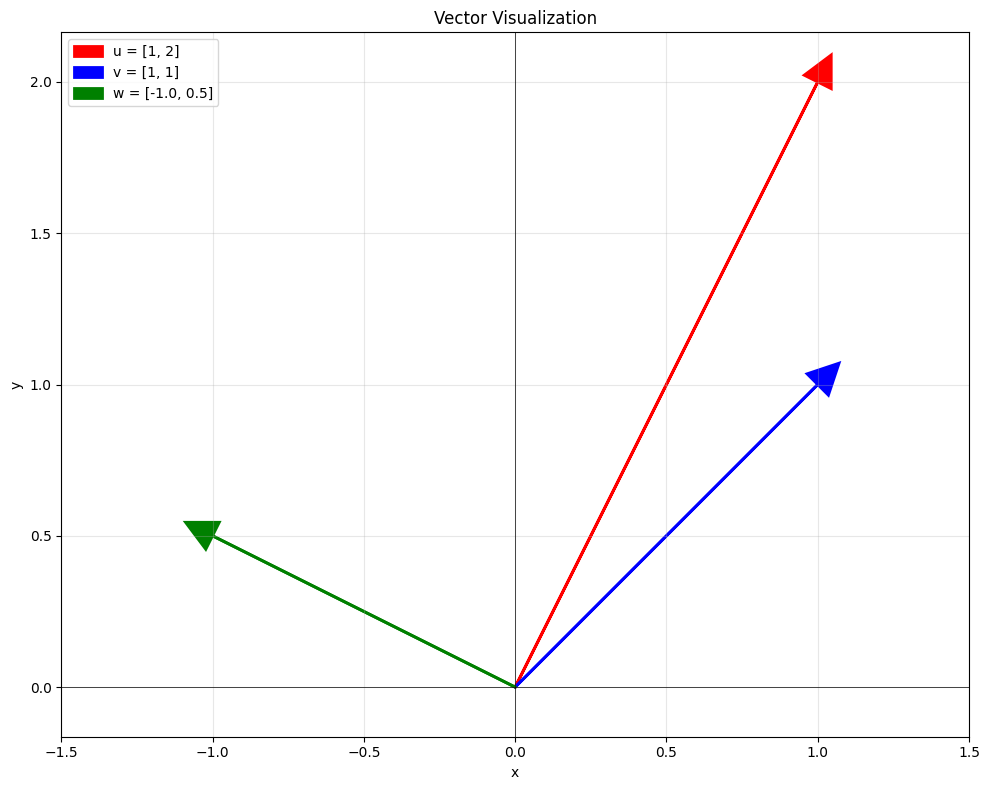

In [61]:
plt.figure(figsize=(10, 8))

colors = ['red', 'blue', 'green']
vector_names = ['u', 'v', 'w']

for i, (name, vec) in enumerate(vectors.items()):
    # i is the index counter provided by the enumerate() function: [(0, ('u', [1, 2])), (1, ('v', [1, 1])), ..]
    # i is used to select the color from the colors list
    plt.arrow(0, 0, vec[0], vec[1], head_width=0.1, head_length=0.1,
              fc=colors[i], ec=colors[i], linewidth=2, label=f"{name} = [{vec[0]}, {vec[1]}]")

# Add grid and labels
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Visualization')
plt.legend()
plt.axis('equal')

# Set reasonable axis limits
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 2.5)

plt.tight_layout()
plt.show()

In [57]:
# Compute the inverse of A.
A = np.array([
    [1, 3],
    [4, 1]
])

In [59]:
np.linalg.det(A)

np.float64(-11.000000000000002)

In [60]:
np.linalg.inv(A)

array([[-0.09090909,  0.27272727],
       [ 0.36363636, -0.09090909]])